In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
df = pd.read_csv('pharmacy_tx.csv')
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00


### Pcn, Group column interactions 

In [266]:
#how do the pcn, group columns interact?
pd.crosstab(df['pcn'], df['group'])

group,0OGKQ,1N5IRQ,6BYJBW,6SP1DG,7DUPMODV0,7Q756WMLLV25X,AJK5MZ25T9IA,BH2Q8B3GY2GAV,DGLGRYP,EVD4X5,...,S2QKZ0OFNWS6X,SJVO3GXUURRGO,T51T6V2E8L,U19J4RVCA,V96T9QL5,VC81HUO7ZD,XK8RM5E75ZW,XY5GQQ9,Z01MLD4I,ZOYKF0N5NEO
pcn,,,,,,,,,,,,,,,,,,,,,
2TIC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,103804,0,0,0
327CKV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28893,0,0
9C5MOR3,0,0,0,0,0,0,0,0,0,0,...,100203,0,0,0,0,0,0,0,0,0
9D24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,93238,0,0,0,0
9FU70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,83021,0,0,0,0,0,0
AZUO5U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIZF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BZ22Z2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46125


In [267]:
#Can't see whole table but looks like just one nonzero entry in each row/column... Let's look another way.

In [268]:
#How many claims are there in each category of pcn,group?
df.value_counts(['pcn', 'group'])

pcn      group        
327CKV   IOEAN1DWVV3Y     1090515
MSCXSG   DGLGRYP           713743
KB38N    6BYJBW            594959
N098KI   6SP1DG            400190
T52GV    EVD4X5            364750
YFVIA    AJK5MZ25T9IA      291860
WM6A     L9QZA             272906
RB7UU    RS5RB3YA          261912
J5DT8    IX6P0             256611
T17LNK   Z01MLD4I          182746
TAZ5W    T51T6V2E8L        161867
RM0HB    SJVO3GXUURRGO     157326
REGLCC   BH2Q8B3GY2GAV     156307
IF448    FZPLF4O6FD        147338
YICC41   MP3IQ             132469
W1LW9Y   0OGKQ             111090
2TIC     XK8RM5E75ZW       103804
BIZF     QK6BI1N61         101105
9C5MOR3  S2QKZ0OFNWS6X     100203
ZQPX     KZWQDIHCLLHD1      96356
9D24     VC81HUO7ZD         93238
XH4T3    GOM8K0             92847
9FU70    U19J4RVCA          83021
AZUO5U   IGN6JL34H37D       68067
OO0E     HPVSQW7M8          60095
RAM3J    7DUPMODV0          47895
P4LC     O19XSLDEFB         46208
BZ22Z2   ZOYKF0N5NEO        46125
W7L3     V96T9QL5        

In [269]:
#This shows that among claims without a null value, there's exactly one group value corresponding to each pcn value.

In [270]:
#What about null values?
df2 = df.copy()
df2['pcn'] = df2['pcn'].fillna('Null')
df2['group'] = df2['group'].fillna('Null')
df2.value_counts(['pcn', 'group'])[:60] #the table has length 63, so this is only missing the last 3 rows

pcn      group        
327CKV   IOEAN1DWVV3Y     1090515
Null     HO8HUGL          1010441
S76J7V6  Null              777502
Null     STGRDKR1J5RD      753156
MSCXSG   DGLGRYP           713743
3O71UTS  Null              690356
1UQC     Null              676984
KB38N    6BYJBW            594959
Null     52H8KH0F83K       507920
         1CAHL             443820
N098KI   6SP1DG            400190
T52GV    EVD4X5            364750
NC7EN    Null              351568
CS8580   Null              305315
YFVIA    AJK5MZ25T9IA      291860
WM6A     L9QZA             272906
RB7UU    RS5RB3YA          261912
J5DT8    IX6P0             256611
Null     YY6B1J4E8KJ3      241607
DY4B     Null              238438
TPJD     Null              226317
T17LNK   Z01MLD4I          182746
7THOQ5   Null              174520
TAZ5W    T51T6V2E8L        161867
RM0HB    SJVO3GXUURRGO     157326
REGLCC   BH2Q8B3GY2GAV     156307
IF448    FZPLF4O6FD        147338
YICC41   MP3IQ             132469
Null     DYGBI610ZY      

In [271]:
#Looks like there's still basically a perfect correspondence between pcn, group values, 
#with some of the values essentially just missing.

### Patient_price as a function of other columns

In [272]:
#Now let's look at how patient_price varies with each of the other columns. We already know the interaction
#that 'rejected' has with patient_price (if rejected = True, then patient_price = 0).

<AxesSubplot:>

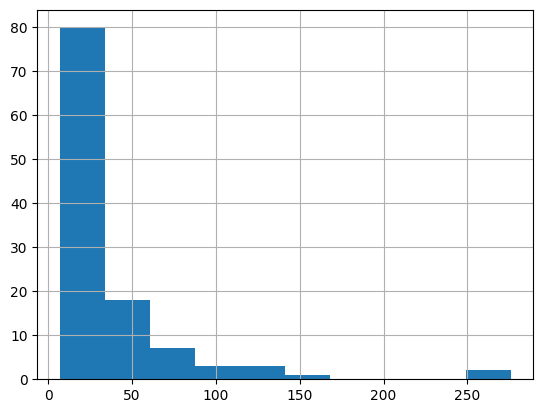

In [274]:
#distribution of mean patient pay by drug
df.groupby(by = 'drug')['patient_pay'].mean().hist()

In [299]:
#which drugs lead to the highest patient prices? 
df[df['patient_pay']>250].drug.unique(), len(df.drug.unique())

(array(['branded monemodiase', 'branded flacelfatastat',
        'branded prefluflomycin', 'branded pheromycin',
        'branded tugesutin', 'branded masonic', 'branded pranic'],
       dtype=object),
 114)

In [315]:
#number of claims each drug has with patient_pay > 250
df[df['patient_pay']>250].drug.value_counts()

branded monemodiase       20768
branded flacelfatastat    16026
branded prefluflomycin    13865
branded pheromycin         6598
branded masonic            3998
branded tugesutin           596
branded pranic               93
Name: drug, dtype: int64

In [318]:
#what proportion of all claims of each drug has patient_price > 250?
I_drug = df[df['patient_pay']>250].drug.value_counts().index
df[df['patient_pay']>250].drug.value_counts()/df.drug.value_counts()[I_drug]

branded monemodiase       0.577788
branded flacelfatastat    0.308941
branded prefluflomycin    0.465097
branded pheromycin        0.571206
branded masonic           0.287460
branded tugesutin         0.005639
branded pranic            0.006792
Name: drug, dtype: float64

In [ ]:
#so the first 5 drugs have patient_price > 250 a significant proprtion of time.  Last 2 only occasionally

In [305]:
#what about by diagnosis?
df[df['patient_pay']>250].diagnosis.value_counts()

Z20.23    14407
U75.95    13873
C14.36    10318
B45.03     9701
I91.91     4124
H86.54     3935
L85.13     1608
H33.06      997
W33.42      994
P79.51      909
Q72.66      328
H89.42      175
N55.01      161
L07.00      113
C98.15      101
U61.13       93
U06.52       69
E11.62       14
A22.87       11
Q60.75        8
H51.45        4
T63.88        1
Name: diagnosis, dtype: int64

In [320]:
#number of claims each diagnosis has with patient_pay > 250
df[df['patient_pay']>250].diagnosis.value_counts()

Z20.23    14407
U75.95    13873
C14.36    10318
B45.03     9701
I91.91     4124
H86.54     3935
L85.13     1608
H33.06      997
W33.42      994
P79.51      909
Q72.66      328
H89.42      175
N55.01      161
L07.00      113
C98.15      101
U61.13       93
U06.52       69
E11.62       14
A22.87       11
Q60.75        8
H51.45        4
T63.88        1
Name: diagnosis, dtype: int64

In [321]:
#what proportion of all claims of each drug has patient_price > 250?
I_diag = df[df['patient_pay']>250].diagnosis.value_counts().index
df[df['patient_pay']>250].diagnosis.value_counts()/df.diagnosis.value_counts()[I_diag]

Z20.23    0.150393
U75.95    0.575810
C14.36    0.518545
B45.03    0.135659
I91.91    0.455993
H86.54    0.210237
L85.13    0.139644
H33.06    0.032041
W33.42    0.570936
P79.51    0.555284
Q72.66    0.000757
H89.42    0.486111
N55.01    0.015429
L07.00    0.020397
C98.15    0.000694
U61.13    0.000440
U06.52    0.001094
E11.62    0.014846
A22.87    0.458333
Q60.75    0.307692
H51.45    0.000941
T63.88    0.002457
Name: diagnosis, dtype: float64

In [300]:
#highest patient prices not very associated with pharmacy
df[df['patient_pay']>250].pharmacy.unique(), len(df.pharmacy.unique())

(array(['Pharmacy #6', 'Pharmacy #53', 'Pharmacy #52', 'Pharmacy #9',
        'Pharmacy #15', 'Pharmacy #38', 'Pharmacy #50', 'Pharmacy #35',
        'Pharmacy #10', 'Pharmacy #51', 'Pharmacy #25', 'Pharmacy #57',
        'Pharmacy #48', 'Pharmacy #12', 'Pharmacy #3', 'Pharmacy #18',
        'Pharmacy #55', 'Pharmacy #22', 'Pharmacy #43', 'Pharmacy #28',
        'Pharmacy #36', 'Pharmacy #32', 'Pharmacy #1', 'Pharmacy #54',
        'Pharmacy #19', 'Pharmacy #42', 'Pharmacy #34', 'Pharmacy #11',
        'Pharmacy #24', 'Pharmacy #13', 'Pharmacy #33', 'Pharmacy #44',
        'Pharmacy #56', 'Pharmacy #14', 'Pharmacy #26', 'Pharmacy #2',
        'Pharmacy #37', 'Pharmacy #46', 'Pharmacy #23', 'Pharmacy #39',
        'Pharmacy #21', 'Pharmacy #41', 'Pharmacy #0', 'Pharmacy #8',
        'Pharmacy #29', 'Pharmacy #31', 'Pharmacy #47', 'Pharmacy #45',
        'Pharmacy #16', 'Pharmacy #27', 'Pharmacy #40', 'Pharmacy #4',
        'Pharmacy #20', 'Pharmacy #49', 'Pharmacy #7', 'Pharmacy #5',
  

<AxesSubplot:>

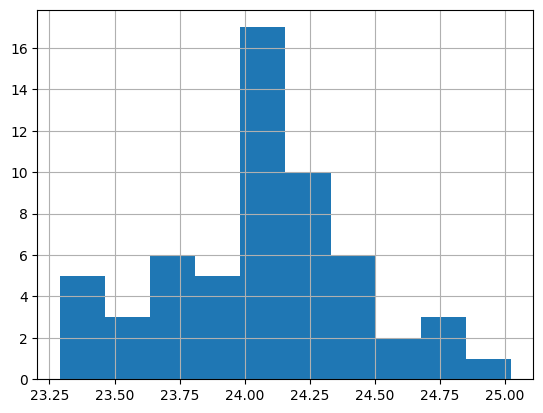

In [275]:
#in fact, little variance in patient_pay by pharmacy at all
df.groupby(by = 'pharmacy')['patient_pay'].mean().hist()

In [335]:
df.patient_pay.describe()

count    1.391024e+07
mean     2.406044e+01
std      3.952487e+01
min      0.000000e+00
25%      8.850000e+00
50%      1.326000e+01
75%      1.889000e+01
max      5.579300e+02
Name: patient_pay, dtype: float64

<AxesSubplot:>

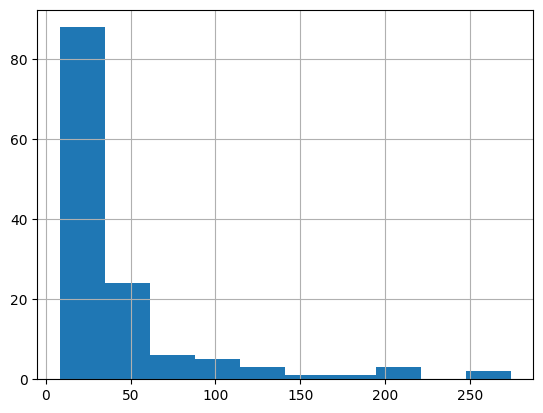

In [302]:
df.groupby(by = 'diagnosis')['patient_pay'].mean().hist()

In [276]:
#Interesting that the drug and diagnosis charts are shaped so similarly, 
#I guess it makes sense that drugs are determined by the diagnosis
#It could also  be that they just both follow a roughly lognormal distribution

### Drug/diagnosis interaction 

In [278]:
#How many of each (drug,diagnosis) pair are there?
df.value_counts(['drug', 'diagnosis'])

drug                  diagnosis
generic prazinib      I68.27       683643
branded prazinib      I68.27       669509
branded mule          I68.27       456689
branded hidizuzunib   I68.27       383316
branded antimab       H36.57       246527
                                    ...  
branded fazipilin     C68.95           10
branded keglusited    U07.99            8
branded colifunene    Z04.98            8
generic fumiluric     G05.97            6
generic cycloxasonol  Q60.75            2
Length: 760, dtype: int64

<AxesSubplot:>

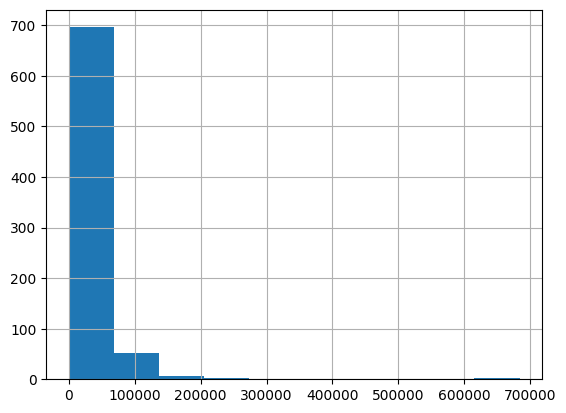

In [322]:
df.value_counts(['drug', 'diagnosis']).hist()

<AxesSubplot:>

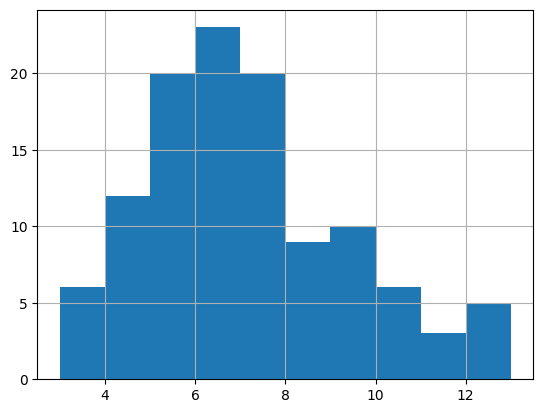

In [281]:
#How many different diagnoses is each drug used for?
df.groupby(by = 'drug')['diagnosis'].nunique().hist()

<AxesSubplot:>

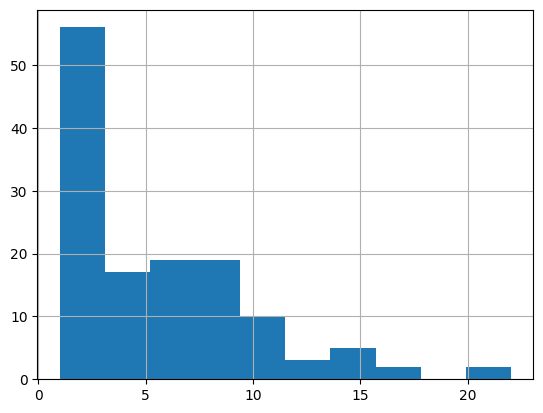

In [282]:
#How many different drugs are used for each diagnosis?
df.groupby(by = 'diagnosis')['drug'].nunique().hist()

<AxesSubplot:>

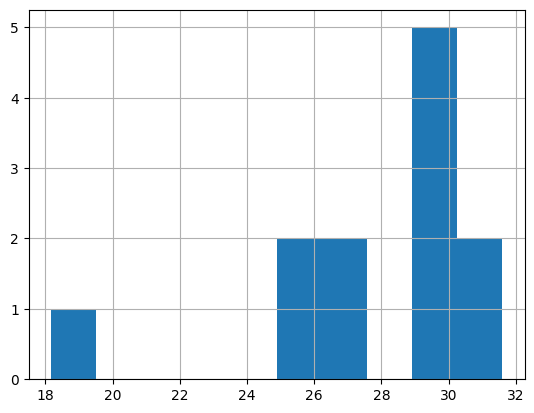

In [284]:
#Looks like bin does not explain much variance of patient_pay
df[df['rejected']==False].groupby(by = 'bin')['patient_pay'].mean().hist()

/var/folders/6h/7cf12br100q1zq0whpzs2tc00000gn/T/ipykernel_78410/4078275015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['rejected']==False][df['patient_pay']<50].groupby(by = 'drug')['patient_pay'].mean().hist()


<AxesSubplot:>

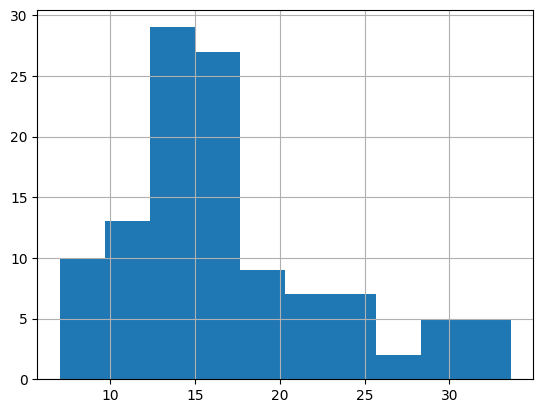

In [328]:
df[df['rejected']==False][df['patient_pay']<50].groupby(by = 'drug')['patient_pay'].mean().hist()

In [330]:
df_claims = df[df['rejected']==False]